In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:

# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)



In [6]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
# Assign the measurement class to a variable called `Measurement`
# Assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
inspector = inspect(engine)
columns_measurement = inspector.get_columns('measurement')
for c in columns_measurement:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Get a list of column names and types in station
inspector = inspect(engine)
columns_station = inspector.get_columns('station')
for c in columns_station:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Find the most recent date in the data set or latest data set

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)     
           


Query Date:  2016-08-23


In [13]:

# Perform a query to retrieve the data and maximum precipitation scores
precipitation_scores = session.query(Measurement.date,Measurement.prcp).\
                  filter((Measurement.date) >= query_date).\
              order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names

precipitation_scores_df = pd.DataFrame(precipitation_scores, columns=['date', 'prcp'])
precipitation_scores_df.set_index('date',inplace=True)



In [14]:
# Sort the dataframe by date

precipitation_scores_df.sort_values('date')


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


In [15]:
precipitation_scores_df.dropna()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


C:\Users\starb\AppData\Local\Temp\ipykernel_876\3364444257.py:5: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,7,10)


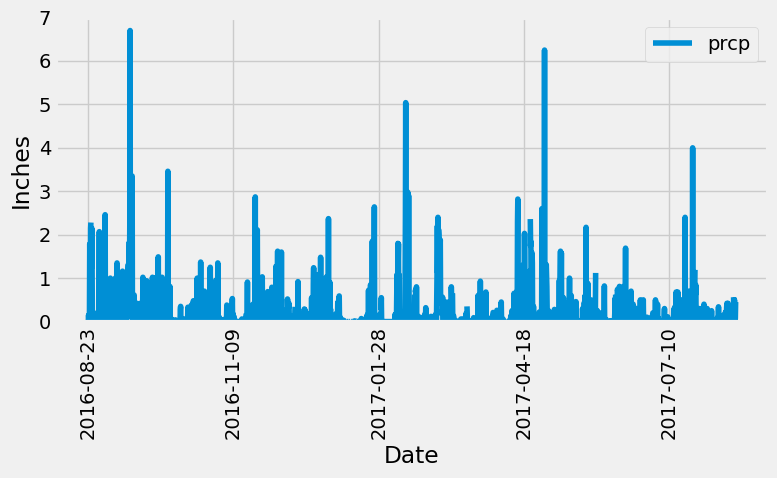

In [16]:

# Use Pandas Plotting with Matplotlib to plot the data

precipitation_scores_df.plot(figsize=(8,5))
plt.xticks(rotation=90)
plt.ylim(0,7,10)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
#save precipitation image 
plt.savefig("Images/precipitation.png")
plt.show()


In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_scores_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset

total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
                         group_by(Measurement.station).\
                         order_by(func.count(Measurement.station).desc()).all()
                   
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
active_station = session.query(*sel).\
        filter(Measurement.station == 'USC00519281').all()
                      
active_station 

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [21]:
# Using the most active station id
#Filter by the station that has the greatest number of observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = session.query(Measurement.tobs).\
        filter(Measurement.station == 'USC00519281').\
            filter(Measurement.date >= query_date).all()

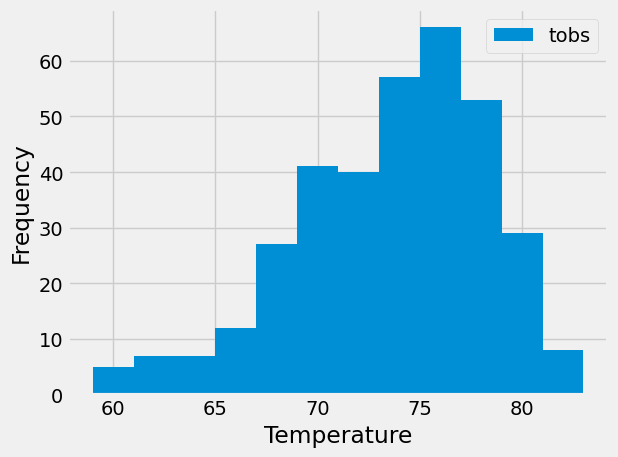

In [22]:
#save the query results in pandas dataframe
temp_frequency_df = pd.DataFrame(active_station)

# Use Pandas Plotting with Matplotlib to plot histogram with temperature vs Frequency
temp_frequency_df.plot(kind = 'hist',bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.tight_layout()
#save histogram image 
plt.savefig("Images/temperature_frequency.png")
plt.show()

# Close Session

In [23]:
# Close Session
session.close()